# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = '../data/Part01'

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [6]:
bin_cut = np.arange(4, 8.3, 0.2)
sub_df = app_train[~app_train['AMT_INCOME_TOTAL'].isnull()]
sub_df['LOG_AMT_INCOME_TOTAL'] = np.log10(sub_df['AMT_INCOME_TOTAL'])
sub_df['LOG_AMT_INCOME_TOTAL_GRP'] = pd.cut(sub_df['LOG_AMT_INCOME_TOTAL'], bin_cut)
sub_df['LOG_AMT_INCOME_TOTAL_GRP'].value_counts().sort_index()

(4.0, 4.2]         0
(4.2, 4.4]         0
(4.4, 4.6]       963
(4.6, 4.8]      8950
(4.8, 5.0]     53785
(5.0, 5.2]    119381
(5.2, 5.4]     84670
(5.4, 5.6]     31699
(5.6, 5.8]      6617
(5.8, 6.0]      1196
(6.0, 6.2]       185
(6.2, 6.4]        46
(6.4, 6.6]        10
(6.6, 6.8]         4
(6.8, 7.0]         2
(7.0, 7.2]         1
(7.2, 7.4]         1
(7.4, 7.6]         0
(7.6, 7.8]         0
(7.8, 8.0]         0
(8.0, 8.2]         1
Name: LOG_AMT_INCOME_TOTAL_GRP, dtype: int64

In [7]:
exam_data = sub_df[['TARGET', 'LOG_AMT_INCOME_TOTAL', 'LOG_AMT_INCOME_TOTAL_GRP']]
exam_data.head()

,TARGET,LOG_AMT_INCOME_TOTAL,LOG_AMT_INCOME_TOTAL_GRP
0,1,5.306425,"(5.2, 5.4]"
1,0,5.431364,"(5.4, 5.6]"
2,0,4.829304,"(4.8, 5.0]"
3,0,5.130334,"(5.0, 5.2]"
4,0,5.084576,"(5.0, 5.2]"


In [8]:
exam_data_groups = exam_data.groupby('LOG_AMT_INCOME_TOTAL_GRP', as_index=False).mean()
exam_data_groups = exam_data_groups[~exam_data_groups['TARGET'].isnull()]
exam_data_groups

,LOG_AMT_INCOME_TOTAL_GRP,TARGET,LOG_AMT_INCOME_TOTAL
2,"(4.4, 4.6]",0.083074,4.527828
3,"(4.6, 4.8]",0.074637,4.717301
4,"(4.8, 5.0]",0.083239,4.916227
5,"(5.0, 5.2]",0.086345,5.116966
6,"(5.2, 5.4]",0.079686,5.302099
7,"(5.4, 5.6]",0.065523,5.479117
8,"(5.6, 5.8]",0.059695,5.658725
9,"(5.8, 6.0]",0.050167,5.865103
10,"(6.0, 6.2]",0.048649,6.092496
11,"(6.2, 6.4]",0.043478,6.301109


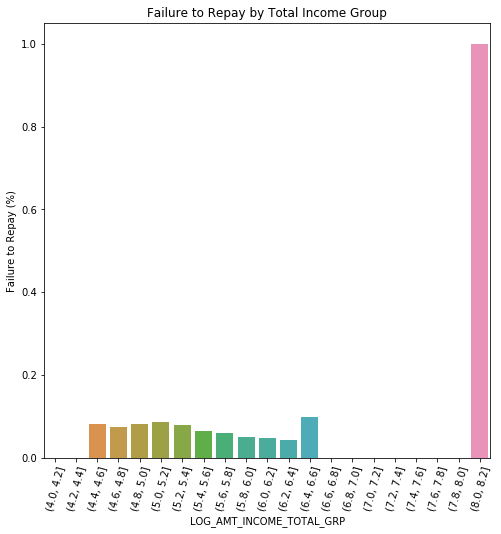

In [9]:
plt.figure(figsize = (8, 8))

px = exam_data_groups['LOG_AMT_INCOME_TOTAL_GRP']
py = exam_data_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('LOG_AMT_INCOME_TOTAL_GRP'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Total Income Group');